importing libraries

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import random
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/content/drive/MyDrive/DataSet/Animals/animals/animals
['panda', 'dogs', 'cats']


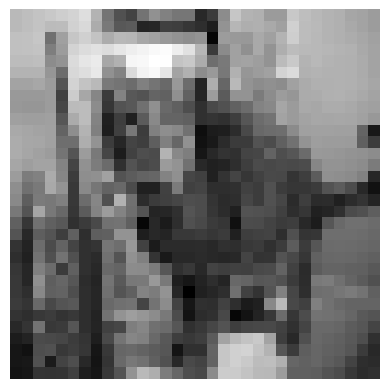

In [ ]:
#Loading Image
training_dir= "/content/drive/MyDrive/DataSet/Animals/animals/animals"

chdir = os.chdir(training_dir)
print(os.getcwd())
print(os.listdir())
image_path_single = os.path.join(training_dir, "cats")
image_load = np.array(cv2.imread(image_path_single+"/cats_00001.jpg"))
image_load = cv2.resize(image_load, (32, 32), interpolation = cv2.INTER_AREA)
image_load = cv2.cvtColor(image_load, cv2.COLOR_BGR2GRAY)
plt.imshow(image_load, cmap='gray')
plt.axis('off')
plt.show()

**Creating a Labeled Dataset**

In [ ]:
def_image = []
label = 10
def_image.append([image_load,label])


print(def_image[0][1])
for image in def_image:
  print(image[1])

10
10


**Exploring Directories and Files**

In [ ]:
#Parent Directory
glob.glob(training_dir)
in_dir_list=[]
#child Directories
for subdir, _, files in os.walk(training_dir):
  in_dir_list.append(subdir)
#print(in_dir_list)
for paths in in_dir_list:
  print (paths)

/content/drive/MyDrive/DataSet/Animals/animals/animals
/content/drive/MyDrive/DataSet/Animals/animals/animals/panda
/content/drive/MyDrive/DataSet/Animals/animals/animals/dogs
/content/drive/MyDrive/DataSet/Animals/animals/animals/cats


**Creating a Labeled Dataset from Multiple Images**

In [ ]:
label_map = {
    'cats': 1,
    'dogs': 2,
    'panda': 3,
}
Training_array = []
globs = glob.glob('*/*.jpg', root_dir=training_dir, recursive=True)


In [ ]:

for file_path in globs:
    filename = os.path.basename(file_path) #Returns only the filename
    folder_name = os.path.basename(os.path.dirname(file_path)) #Returns only the foldername

    #print(label_map[folder_name])
    print(filename)
    image = np.array(cv2.imread(file_path))
    image = cv2.resize(image, (32, 32), interpolation = cv2.INTER_AREA)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # plt.imshow(image, cmap='gray')
    # plt.axis('off')
    # plt.show()
    Training_array.append([image, [label_map[folder_name]]])
    #print(label_map[folder_name])
    #print(Training_array)
    print(len(Training_array))


Streaming output truncated to the last 5000 lines.
panda_00458.jpg
525
panda_00480.jpg
526
panda_00488.jpg
527
panda_00492.jpg
528
panda_00516.jpg
529
panda_00541.jpg
530
panda_00534.jpg
531
panda_00496.jpg
532
panda_00559.jpg
533
panda_00474.jpg
534
panda_00558.jpg
535
panda_00511.jpg
536
panda_00563.jpg
537
panda_00552.jpg
538
panda_00545.jpg
539
panda_00467.jpg
540
panda_00447.jpg
541
panda_00543.jpg
542
panda_00439.jpg
543
panda_00490.jpg
544
panda_00457.jpg
545
panda_00556.jpg
546
panda_00560.jpg
547
panda_00527.jpg
548
panda_00530.jpg
549
panda_00507.jpg
550
panda_00468.jpg
551
panda_00482.jpg
552
panda_00517.jpg
553
panda_00522.jpg
554
panda_00499.jpg
555
panda_00536.jpg
556
panda_00485.jpg
557
panda_00471.jpg
558
panda_00508.jpg
559
panda_00494.jpg
560
panda_00449.jpg
561
panda_00462.jpg
562
panda_00500.jpg
563
panda_00460.jpg
564
panda_00562.jpg
565
panda_00596.jpg
566
panda_00610.jpg
567
panda_00660.jpg
568
panda_00577.jpg
569
panda_00606.jpg
570
panda_00624.jpg
571
panda_006

**Data Preparation**

In [ ]:
random.shuffle(Training_array)
data = np.array([item[0] for item in Training_array])  # All rows, column 0
labels = np.array([item[1] for item in Training_array])  # All rows, column 1
print("Features shape:", data.shape)
print("Labels shape:", labels.shape)

Features shape: (3024, 32, 32)
Labels shape: (3024, 1)


**Label Encoding & Reshaping Data**

In [ ]:
le = LabelEncoder()
lables = le.fit_transform(labels)

myset = set(lables)
print(myset)

dataset_size = data.shape[0]
data = data.reshape(dataset_size,-1)

print(data.shape)
print(lables.shape)
print(dataset_size)

{0, 1, 2}
(3024, 1024)
(3024,)
3024


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Displaying an Image**

1


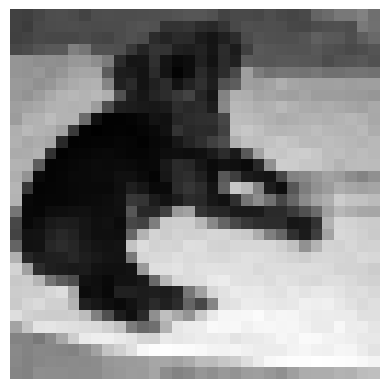

In [ ]:
image_number=1936
un_Flatten_Image = data[image_number].reshape(32,32)
plt.imshow(un_Flatten_Image, cmap='gray')
print(lables[image_number])
plt.axis('off')
plt.show()

In [ ]:
k_values = range(1, 7)
accuracy_man = []
accuracy_euclidean = []

# Iterate over each value of K
for k in k_values:
    # Manhattan distance
    model_man = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    model_man.fit(data, lables)
    # Evaluate the model using cross-validation
    scores_man = cross_val_score(model_man, data, lables, cv=5)
    accuracy_man.append(scores_man.mean())

    # Euclidean distance
    model_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    model_euclidean.fit(data, lables)
    # Evaluate the model using cross-validation
    scores_euclidean = cross_val_score(model_euclidean, data, lables, cv=5)
    accuracy_euclidean.append(scores_euclidean.mean())

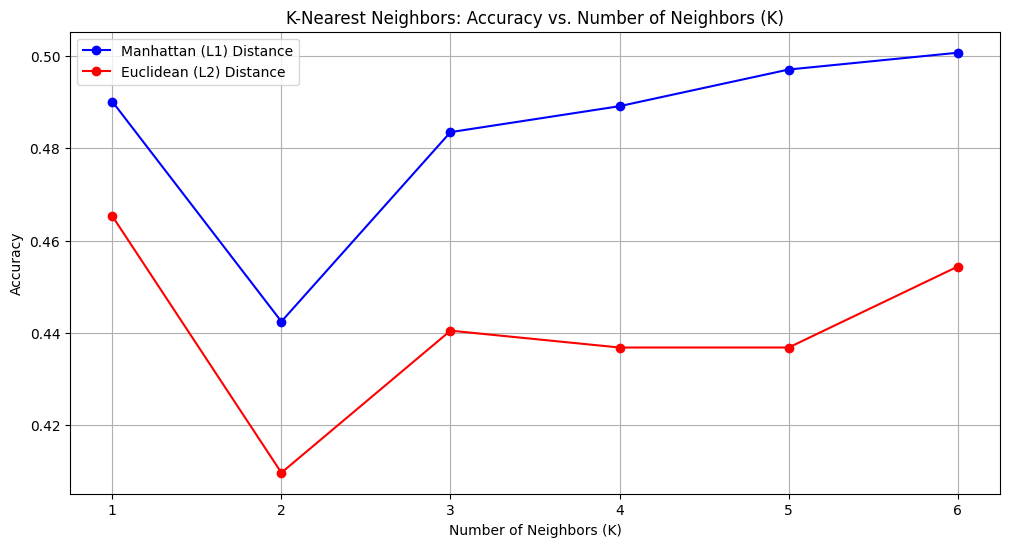

In [ ]:
plt.figure(figsize=(12, 6))

# Plot for Manhattan distance
plt.plot(k_values, accuracy_man, marker='o', linestyle='-', color='b', label='Manhattan (L1) Distance')

# Plot for Euclidean distance
plt.plot(k_values, accuracy_euclidean, marker='o', linestyle='-', color='r', label='Euclidean (L2) Distance')

plt.title('K-Nearest Neighbors: Accuracy vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

[2093 2623 2905  132  719]
5120
[0 2 0 0 0]


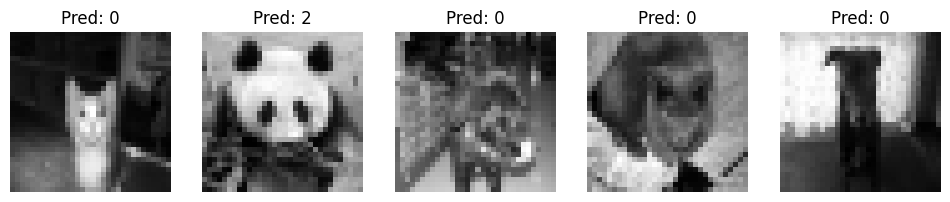

In [ ]:
num_predictions = 5
indices = np.random.choice(len(data), num_predictions, replace=False)
print(indices)
sample_images = data[indices]
print(sample_images.size)
sample_labels = lables[indices]

predictions = model_euclidean.predict(sample_images)
print(predictions)
# Plot the images and predictions
plt.figure(figsize=(12, 6))
for i in range(num_predictions):
    plt.subplot(1, num_predictions, i + 1)
    sample_images=data[i].reshape(32,32)
    plt.imshow(sample_images, cmap='gray')  # Assuming grayscale images
    plt.title(f'Pred: {predictions[i]}')
    plt.axis('off')
plt.show()

[1194  903  266 1173 2611]
5120
[0 0 1 1 0]


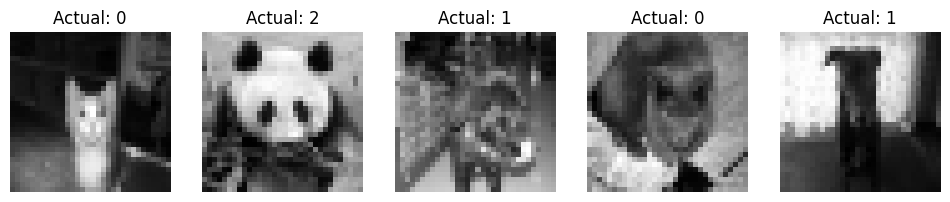

In [ ]:
num_predictions = 5
indices = np.random.choice(len(data), num_predictions, replace=False)
print(indices)
sample_images = data[indices]
print(sample_images.size)
sample_labels = lables[indices]

predictions = model_man.predict(sample_images)
print(predictions)
# Plot the images and predictions
plt.figure(figsize=(12, 6))
for i in range(num_predictions):
    plt.subplot(1, num_predictions, i + 1)
    sample_images=data[i].reshape(32,32)
    plt.imshow(sample_images, cmap='gray')  # Assuming grayscale images
    # plt.title(f'Pred: {predictions[i]}')
    plt.title(f'Actual: {lables[i]}')
    plt.axis('off')
plt.show()